In [229]:
import csv
import pandas as pd
import numpy as np
from scipy.stats import normaltest
from matplotlib import pyplot as plt
import statsmodels.formula.api as sm
import os

In [230]:
# finding draftpicks.csv in pandas
print("The directory we are working in is: {}".format(os.getcwd()))
data = pd.read_csv("draftpicks.csv")

print(type(data))

The directory we are working in is: /Users/Drew/Documents/GitHub/Gillis_LMSC_261_ProblemSets/FinalProject/Project Files
<class 'pandas.core.frame.DataFrame'>


In [231]:
# keyword 'data' will run the data frame in pandas
data

,Active MLB Non-Pitcher,Career fWAR,Overall Draft Pick,MLB Experience (years)
0,Albert Pujols,87.7,402,19.000
1,Mike Trout,73.4,25,8.070
2,Miguel Cabrera,70.6,intl,16.101
3,Robinson Cano,57.3,intl,14.076
4,Joey Votto,56.2,44,12.027
...,...,...,...,...
295,Jose Osuna,-0.8,intl,2.069
296,Ronny Rodriguez,-0.8,intl,1.079
297,Isiah Kiner-Falefa,-1.0,130,2.000
298,Raimel Tapia,-1.1,intl,2.020


In [232]:
# Delete the rows with label "intl"
# set the index first on the dataframe

indexNames = data[data['Overall Draft Pick'] == 'intl' ].index
data.drop(indexNames , inplace=True)

data

,Active MLB Non-Pitcher,Career fWAR,Overall Draft Pick,MLB Experience (years)
0,Albert Pujols,87.7,402,19.000
1,Mike Trout,73.4,25,8.070
4,Joey Votto,56.2,44,12.027
5,Yadier Molina,54.0,113,15.123
6,Buster Posey,52.7,5,9.161
...,...,...,...,...
292,Greg Allen,-0.1,188,1.099
293,Ryan O'Hearn,-0.2,243,1.034
294,Dominic Smith,-0.2,11,1.146
297,Isiah Kiner-Falefa,-1.0,130,2.000


In [233]:
# creating callable list of columns
cols = data.columns.tolist()
# calling to confirm column info is correct
cols

['Active MLB Non-Pitcher',
 'Career fWAR',
 'Overall Draft Pick',
 'MLB Experience (years)']

In [234]:
data

,Active MLB Non-Pitcher,Career fWAR,Overall Draft Pick,MLB Experience (years)
0,Albert Pujols,87.7,402,19.000
1,Mike Trout,73.4,25,8.070
4,Joey Votto,56.2,44,12.027
5,Yadier Molina,54.0,113,15.123
6,Buster Posey,52.7,5,9.161
...,...,...,...,...
292,Greg Allen,-0.1,188,1.099
293,Ryan O'Hearn,-0.2,243,1.034
294,Dominic Smith,-0.2,11,1.146
297,Isiah Kiner-Falefa,-1.0,130,2.000


In [235]:
# important to note that I am not changing the index to match player's place in the new data set.
# I want to maintain their active ranking amongst non-position players, not just those who were drafted.
# Initially I changed the index, but realized it was a poor reflection of the data. The code I initially used is commented below.

# data.reset_index(drop=True)


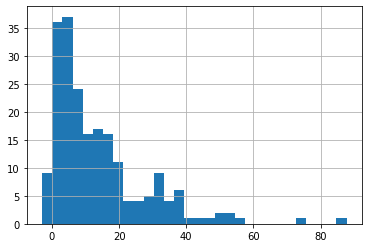

In [236]:
# after taking out the internationally signed players that were not drafted, I want to take a look at the distribtution
data['Career fWAR'].hist(bins=30)

In [237]:
# seems far more logarithmic than normal. looking at extra stats of the data
data.describe()

,Career fWAR,MLB Experience (years)
count,208.000000,208.000000
mean,13.706731,5.357115
std,14.198518,3.492349
min,-2.900000,0.163000
25%,3.775000,3.011250
50%,9.100000,5.029500
75%,18.700000,7.161250
max,87.700000,19.000000


In [238]:
# need to start creating a logarithmic measure of the career WAR statistic. starting that mathematical process here
mu = 13.706731
sigma = 14.198518
normal_sigma = np.sqrt(np.log(1 + (sigma/mu)**2))
normal_mu = np.log(mu) - normal_sigma**2 / 2

In [239]:
# creating the logWAR column.
data['logWAR'] = np.log(data['Career fWAR'])

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [240]:
# need to get rid of outlier players with career WAR <= 0, because a log cannot take these values. 
# WAR stands for "wins above replacement" and the replacement is a hypothetical minor league player.
# Therefore, the players with WAR <= 0 can be seen as outliers because they would not have a job if not for the terrible teams they play for.
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna()

In [241]:
data

,Active MLB Non-Pitcher,Career fWAR,Overall Draft Pick,MLB Experience (years),logWAR
0,Albert Pujols,87.7,402,19.000,4.473922
1,Mike Trout,73.4,25,8.070,4.295924
4,Joey Votto,56.2,44,12.027,4.028917
5,Yadier Molina,54.0,113,15.123,3.988984
6,Buster Posey,52.7,5,9.161,3.964615
...,...,...,...,...,...
282,Adam Engel,0.3,573,2.058,-1.203973
283,Jake Bauers,0.3,208,1.100,-1.203973
284,Rio Ruiz,0.3,129,1.109,-1.203973
288,Andrew Knapp,0.1,53,3.000,-2.302585


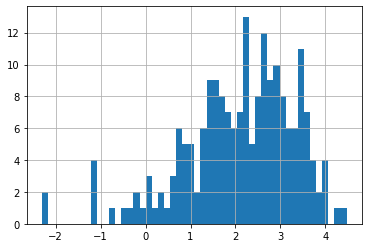

In [242]:
# want to see the distribution of logWAR vs. Career WAR to see if it is more normalized for a regression
data['logWAR'].hist(bins=50)

In [243]:
# it is... but hard to tell if it is by a significant amount. checking here - looking for how small the second value is. Larger = more normal
stat, p = normaltest(data['logWAR'])
print(stat,p)

25.954604419320184 2.3122205695269693e-06


In [244]:
stat, p = normaltest(data['Career fWAR'])
print(stat,p)

85.76596123611911 2.3777059798067313e-19


In [245]:
# confirmed going to use logWAR as a more normalized distribution. But need to rename the columns to have no spaces before I use regression.
data = data.rename(columns = {'Overall Draft Pick':'draft_pick', 
                          'MLB Experience (years)':'years_exper', 
                          'Career fWAR':'war'})

data

,Active MLB Non-Pitcher,war,draft_pick,years_exper,logWAR
0,Albert Pujols,87.7,402,19.000,4.473922
1,Mike Trout,73.4,25,8.070,4.295924
4,Joey Votto,56.2,44,12.027,4.028917
5,Yadier Molina,54.0,113,15.123,3.988984
6,Buster Posey,52.7,5,9.161,3.964615
...,...,...,...,...,...
282,Adam Engel,0.3,573,2.058,-1.203973
283,Jake Bauers,0.3,208,1.100,-1.203973
284,Rio Ruiz,0.3,129,1.109,-1.203973
288,Andrew Knapp,0.1,53,3.000,-2.302585


In [246]:
# draft_pick initially had lots of "intl" inputs, making it a string column. Need to change to int before regressing.
data['draft_pick'] = data['draft_pick'].astype(int)

In [247]:
# ensuring that code didn't mess up the data
data

,Active MLB Non-Pitcher,war,draft_pick,years_exper,logWAR
0,Albert Pujols,87.7,402,19.000,4.473922
1,Mike Trout,73.4,25,8.070,4.295924
4,Joey Votto,56.2,44,12.027,4.028917
5,Yadier Molina,54.0,113,15.123,3.988984
6,Buster Posey,52.7,5,9.161,3.964615
...,...,...,...,...,...
282,Adam Engel,0.3,573,2.058,-1.203973
283,Jake Bauers,0.3,208,1.100,-1.203973
284,Rio Ruiz,0.3,129,1.109,-1.203973
288,Andrew Knapp,0.1,53,3.000,-2.302585


In [250]:
# creating the regression - using logWAR as the DV, and years-exper and draft_pick as 2 separate IVs. Is there correlation between either of them and logWAR?
# Looking for a P value <= .1 - this would indicate a confidence interval of 90% or higher.
result = sm.ols(formula="logWAR ~ years_exper + draft_pick", data=data).fit() 

In [251]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 logWAR   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     76.98
Date:                Mon, 04 May 2020   Prob (F-statistic):           2.12e-25
Time:                        23:03:13   Log-Likelihood:                -267.16
No. Observations:                 199   AIC:                             540.3
Df Residuals:                     196   BIC:                             550.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.8128      0.133      6.124      

In [256]:
# creating the regression - using logWAR as the DV, and years-exper and draft_pick as 2 separate IVs. Is there correlation between either of them and logWAR?
# Looking for a P value <= .1 - this would indicate a confidence interval of 90% or higher.
result = sm.ols(formula="years_exper ~ draft_pick", data=data).fit() 

In [257]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            years_exper   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.09784
Date:                Mon, 04 May 2020   Prob (F-statistic):              0.755
Time:                        23:04:39   Log-Likelihood:                -529.97
No. Observations:                 199   AIC:                             1064.
Df Residuals:                     197   BIC:                             1071.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.4638      0.307     17.787      0.0

In [258]:
# while years_exper has a very significant correlation to logWAR, draft_pick does NOT. 
# I will dive deeper into what these findings indicate, and further research that can come from this conclusion.
# see attached README.md for more details.